In [1]:
import pandas as pd 
import numpy as np

In [6]:
df= pd.read_csv('house_data.csv')
df.shape

(20640, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
#fill the total bedroom null values with ratio of total bedrooms to total rooms
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


C:\Users\adity\AppData\Local\Temp\ipykernel_1916\1690947664.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


In [10]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

After removing total_rooms, total_bedrooms, population, households:

Linear Regression:
  MSE: 5,856,899,948.57
  RMSE: 76,530.39
  R² Score: 0.5530

Random Forest:
  MSE: 2,465,089,249.19
  RMSE: 49,649.67
  R² Score: 0.8119


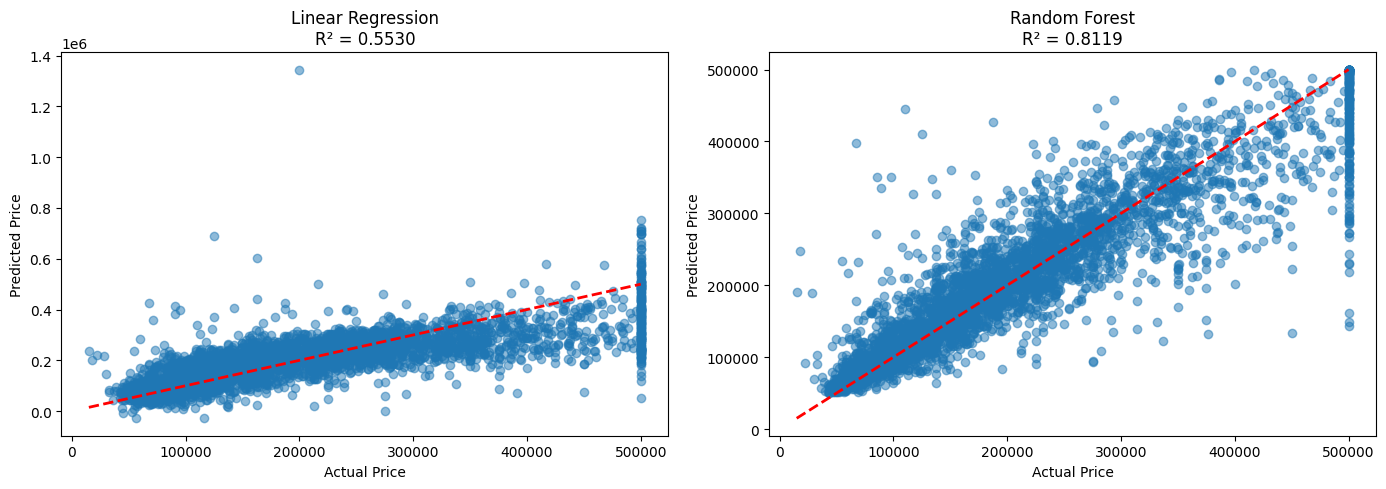

In [19]:
# Remove specified columns
df_cleaned = df.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1)

# Prepare data - handle categorical variable (ocean_proximity)
df_encoded = pd.get_dummies(df_cleaned, columns=['ocean_proximity'], drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Calculate metrics
from sklearn.metrics import r2_score
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("After removing total_rooms, total_bedrooms, population, households:")
print("\nLinear Regression:")
print(f"  MSE: {lr_mse:,.2f}")
print(f"  RMSE: {np.sqrt(lr_mse):,.2f}")
print(f"  R² Score: {lr_r2:.4f}")
print("\nRandom Forest:")
print(f"  MSE: {rf_mse:,.2f}")
print(f"  RMSE: {np.sqrt(rf_mse):,.2f}")
print(f"  R² Score: {rf_r2:.4f}")

# Create visualization comparing predictions vs actual
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear Regression plot
axes[0].scatter(y_test, lr_predictions, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title(f'Linear Regression\nR² = {lr_r2:.4f}')

# Random Forest plot
axes[1].scatter(y_test, rf_predictions, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].set_title(f'Random Forest\nR² = {rf_r2:.4f}')

plt.tight_layout()
plt.show()